![banner](../img/cdips_2017_logo.png)

# Loading, Visualizing, and Exploring the Data

This notebook will help you start 
to explore the soil spectral data
through [pandas](https://pandas.pydata.org/pandas-docs/stable/), 
[seaborn](http://seaborn.pydata.org/index.html), 
and [matplotlib](https://matplotlib.org/index.html).

All of these packages are well-documented and
easy-to-use, so they make for great tools
to use when first looking at data.

A good resource for learning pandas 
can be found [here](https://github.com/brandon-rhodes/pycon-pandas-tutorial).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import numpy as np

import seaborn as sns
sns.set(font_scale=2)

import scripts.load_data as load

%matplotlib inline

#### Load the data and view the first few columns

Pandas can read the contents of a csv file
directly into a pandas dataframe, just tell
it where to find the file.

However, here we use our
built-in data loader `load_training_spectra`
to get our feature
and target dataframes, and stitch them together
into one.  It makes loading data a breeze!


In [2]:
#data = pd.read_csv('../data/training.csv')

X,y=load.load_training_spectra(include_pidn=True,include_depth=True)

# joining features and targets into one dataframe
data = pd.concat([X, y], axis=1)


data.head()

,PIDN,7497.96,7496.04,7494.11,7492.18,7490.25,7488.32,7486.39,7484.46,7482.54,...,605.545,603.617,601.688,599.76,Depth,Ca,P,pH,SOC,Sand
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,...,1.76644,1.75086,1.74335,1.74246,Topsoil,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,...,1.78410,1.77195,1.76479,1.75437,Subsoil,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,...,1.72894,1.71991,1.71562,1.71158,Topsoil,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,...,1.69952,1.69356,1.68812,1.68178,Subsoil,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,...,1.64929,1.64089,1.62805,1.61643,Topsoil,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


#### View some randomly chosen columns

In [3]:
data.sample(5)

,PIDN,7497.96,7496.04,7494.11,7492.18,7490.25,7488.32,7486.39,7484.46,7482.54,...,605.545,603.617,601.688,599.76,Depth,Ca,P,pH,SOC,Sand
769,OGOPFZ9a,0.187021,0.182074,0.176875,0.179827,0.189561,0.194371,0.187656,0.179068,0.176775,...,1.62084,1.62595,1.63281,1.64092,Subsoil,-0.516159,-0.373349,-0.998426,-0.685962,-0.241218
990,yl5o4ABk,0.167530,0.164320,0.161628,0.163794,0.169239,0.170807,0.165830,0.161001,0.159975,...,1.53946,1.54320,1.54553,1.54506,Subsoil,-0.528886,-0.082838,-1.054543,-0.490620,1.090868
535,oLvBVSxD,0.336276,0.331689,0.327959,0.330293,0.336699,0.338818,0.332692,0.326019,0.324646,...,1.71650,1.70955,1.70194,1.69455,Topsoil,-0.324964,-0.359515,-0.914251,3.541244,-1.245991
563,AX8wRDaA,0.389465,0.383608,0.378219,0.381183,0.390451,0.394477,0.386670,0.377008,0.374502,...,1.68950,1.67830,1.66904,1.65893,Topsoil,0.172838,-0.324931,-0.455961,2.486396,-1.116588
801,80phrt89,0.230397,0.224068,0.217665,0.221448,0.233587,0.239677,0.231541,0.220857,0.217819,...,1.45414,1.44179,1.43083,1.41861,Subsoil,-0.459465,-0.324931,-0.904898,-0.381228,-0.789276


#### List the columns

In [4]:
data.columns

Index(['PIDN', '7497.96', '7496.04', '7494.11', '7492.18', '7490.25',
       '7488.32', '7486.39', '7484.46', '7482.54',
       ...
       '605.545', '603.617', '601.688', '599.76', 'Depth', 'Ca', 'P', 'pH',
       'SOC', 'Sand'],
      dtype='object', length=3585)

#### Pickout the output variables and look at their descriptive statistics

There are a lot of built-in pandas methods
that can be used to
explore a pandas dataframe. 

`.describe()` is great
for a quick look at some standard statistics
quantities.

In [5]:
output_variables = ["Ca","P","pH","SOC","Sand"]

data[output_variables].describe()

,Ca,P,pH,SOC,Sand
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,0.006442,-0.014524,-0.028543,0.080414,-0.012646
std,1.070541,0.995469,0.920224,1.141989,0.988520
min,-0.535828,-0.418309,-1.886946,-0.857863,-1.493378
25%,-0.451077,-0.345681,-0.717841,-0.615639,-0.899649
50%,-0.348682,-0.269595,-0.175376,-0.349974,-0.134651
75%,-0.042654,-0.089755,0.376442,0.275121,0.786391
max,9.645815,13.266841,3.416117,7.619989,2.251685


#### Visualize marginal and pairwise distribution of outputs

Seaborn is a python visualization library that
allows you to create statistical plots with
ease.  

`pairplot` creates a
grid of pairwise distributions in just a single line!

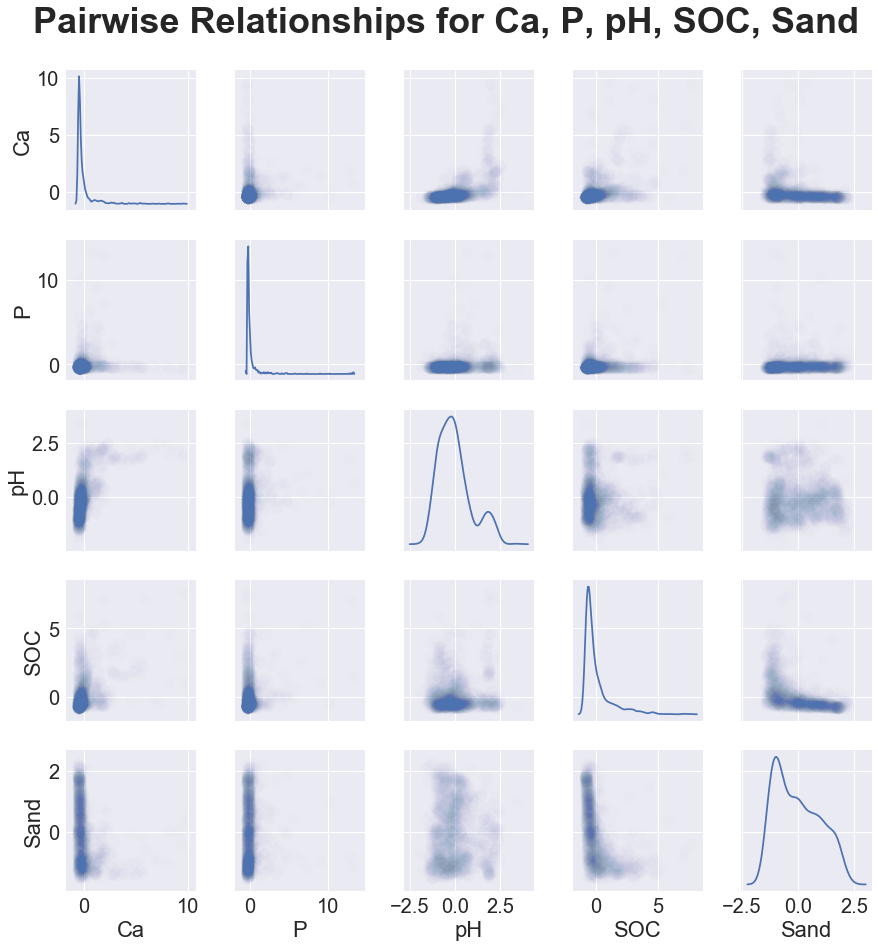

In [6]:
sns.pairplot(data=data,
                vars=output_variables,
            plot_kws={'alpha':0.01,'s':144},
            diag_kind='kde');

plt.suptitle('Pairwise Relationships for '+ ', '.join(output_variables),
            fontsize=36,fontweight='bold',y=1.05
            );

#### Select and Plot a Random Spectrum

While seaborn is good for visualizing statistics,
matplotlib is still the go-to standard
for general plotting.  Let's plot the spectrum
for one of our samples.

In [7]:
data_columns = [column for column in X.columns if (column!='PIDN' and column !='Depth')]
wavenumbers=[float(column) for column in data_columns]

In [8]:
random_data_point = data.sample(1)
random_data_point

,PIDN,7497.96,7496.04,7494.11,7492.18,7490.25,7488.32,7486.39,7484.46,7482.54,...,605.545,603.617,601.688,599.76,Depth,Ca,P,pH,SOC,Sand
875,zKnHoO1Q,0.141591,0.135858,0.130492,0.132921,0.141279,0.144416,0.136492,0.127482,0.125677,...,1.51267,1.50492,1.49863,1.49413,Topsoil,-0.348682,-0.273054,-0.493372,-0.615639,0.413407


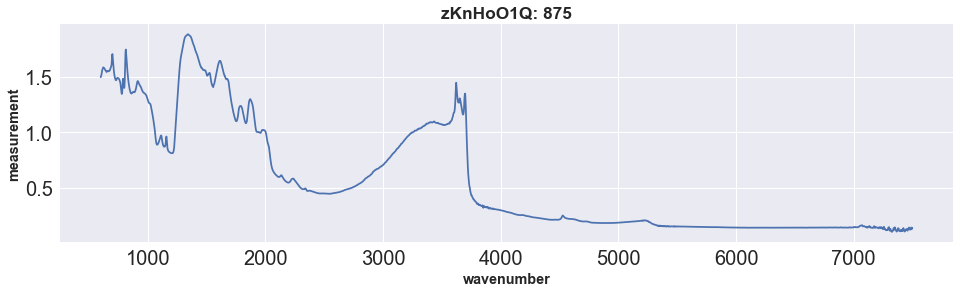

In [9]:
spectrum_as_dataframe = random_data_point[data_columns]

spectrum_as_series = spectrum_as_dataframe.iloc[0]
PIDN = random_data_point['PIDN'].iloc[0]
spectrum_array = spectrum_as_series.as_matrix()
numericID = spectrum_as_series.name

plt.figure(figsize=(16,4))
plt.plot(wavenumbers,spectrum_array); plt.title(PIDN+': '+str(numericID), 
                                    fontweight='bold',fontsize='xx-large');
plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('measurement',fontweight='bold',fontsize='x-large');

#### Plot Average Spectrum +/- 1 SD

First we grab the descriptive stats using 
`.describe()`, then we use the `mean`s and
`std`s to build an `errorbar` plot.

One possible alteration would be to use the 
median (`50%`) and quartile values (`25%` and `75%`) 
instead. We might get a different picture, especially of the variability.

In [10]:
all_spectra_dataframe = data[data_columns]

In [11]:
stats = all_spectra_dataframe.describe()

stats

,7497.96,7496.04,7494.11,7492.18,7490.25,7488.32,7486.39,7484.46,7482.54,7480.61,...,617.116,615.188,613.259,611.331,609.402,607.474,605.545,603.617,601.688,599.76
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,...,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,0.245666,0.240454,0.235631,0.238994,0.248176,0.251674,0.243996,0.235162,0.232874,0.232518,...,1.621387,1.615671,1.609609,1.602812,1.595395,1.588021,1.581357,1.575661,1.570702,1.566095
std,0.114439,0.114804,0.115288,0.115075,0.114185,0.113603,0.113974,0.114723,0.115031,0.115021,...,0.203323,0.198371,0.193652,0.189194,0.185172,0.181657,0.178563,0.175859,0.173415,0.171090
min,-0.042260,-0.048559,-0.055518,-0.052353,-0.040608,-0.034516,-0.042619,-0.053856,-0.057699,-0.058482,...,0.927082,0.935663,0.944329,0.953882,0.964296,0.975861,0.987868,0.999643,1.012760,1.023430
25%,0.171156,0.166020,0.161043,0.164470,0.173065,0.175476,0.169058,0.161094,0.159238,0.158868,...,1.488950,1.486420,1.484300,1.478590,1.469110,1.463620,1.457130,1.455110,1.447870,1.443850
50%,0.252899,0.247918,0.244594,0.247920,0.255784,0.258029,0.251061,0.243775,0.241991,0.241599,...,1.632500,1.623430,1.615780,1.605710,1.599760,1.589820,1.577530,1.575070,1.572230,1.565840
75%,0.315508,0.310354,0.304742,0.309540,0.317786,0.320834,0.314091,0.304301,0.303235,0.302438,...,1.765060,1.757340,1.750270,1.741990,1.732700,1.722190,1.711970,1.704110,1.694240,1.687500
max,0.730793,0.725493,0.720711,0.723293,0.731205,0.733872,0.726075,0.717652,0.716443,0.716307,...,2.074840,2.069870,2.063750,2.060970,2.062620,2.058860,2.044370,2.028590,2.021880,2.014480


In [12]:
average_values = stats.loc['mean'].as_matrix()
sds = stats.loc['std'].as_matrix()

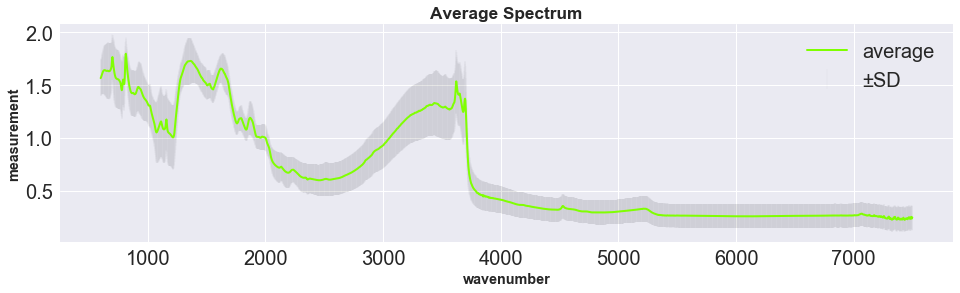

In [13]:
plt.figure(figsize=(16,4))

plt.errorbar(x=wavenumbers,y=average_values,yerr=sds,
            errorevery=1,ecolor='k',color='w',alpha=0.01,zorder=1,
            label='±SD');

plt.plot(wavenumbers,average_values,color='chartreuse',
         linewidth=2,zorder=1,label='average'
        );

plt.legend()
plt.title('Average Spectrum', fontweight='bold',fontsize='xx-large');

plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('measurement',fontweight='bold',fontsize='x-large');

#### SNR by Wavenumber

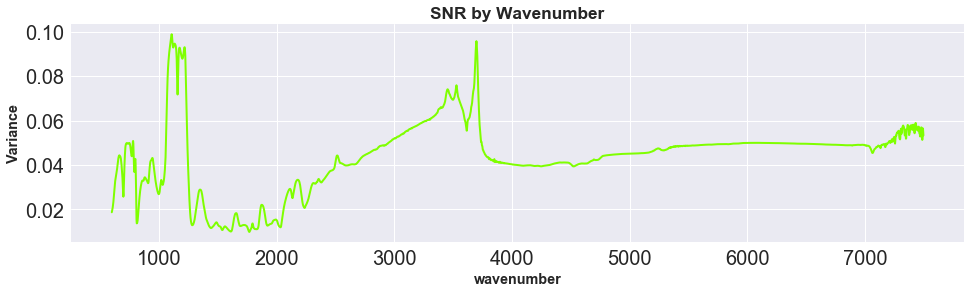

In [14]:
plt.figure(figsize=(16,4))

plt.plot(wavenumbers,
         #np.square(sds),
         np.divide(np.square(sds),
                            average_values),
         color='chartreuse',
         linewidth=2,zorder=1,
        );

plt.title('SNR by Wavenumber', fontweight='bold',fontsize='xx-large');

plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('Variance',fontweight='bold',fontsize='x-large');

Pandas dataframes offer many ways 
to help you find exactly the sample 
or subsample you're looking for.  One
of these is the `.groupby` method,
where you can split your sample up
according to some categorical variable.

Here we group by depth, and plot with
pandas' integrated `.plot` method.


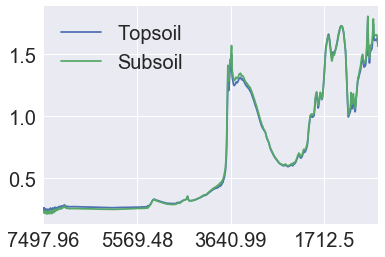

In [15]:
data.groupby('Depth').get_group('Topsoil').mean().loc[data_columns].plot(label='Topsoil',legend=True)
data.groupby('Depth').get_group('Subsoil').mean().loc[data_columns].plot(label='Subsoil',legend=True);


Other useful pandas tools are the 
`.sort_values` and `.head` or `.tail` methods. 
You can sort your entire dataset according to 
the values of a particular column, and
then compare the highest ones to the lowest ones.

Here we sort by target value Ca, and plot the averaged spectra
of the 100 samples with the highest Ca content, and the averaged
spectra of the 100 samples with the lowest Ca content.

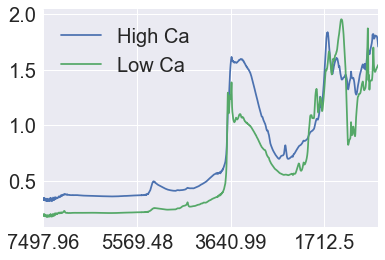

In [16]:
data.sort_values('Ca').tail(100).mean().loc[data_columns].plot(label='High Ca',legend=True)
data.sort_values('Ca').head(100).mean().loc[data_columns].plot(label='Low Ca',legend=True);


There seems to be a noticeable difference 
between the spectra for high-Ca-content soil 
versus low-Ca-content soil!  With any luck,
our machine learning models will pick up on this.

Stringing together pandas dataframe methods 
almost tells a story of where you're trying 
to go in your data.  This can be satisfying, but
also confusing at first glance.

Check out the [Interactive Data Visualizations](file/../00_B - Interactive Data Visualisations.ipynb) 
notebook if you'd like to explore data with an 
easy-to-use graphical interface.  Also 
go to try and make your own interactive
visualizations from the data.
